In [2]:
import keras
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import csv
import os
from skimage.io import imread
from skimage.transform import resize

In [3]:
model = load_model("Models/Model_CNN6layer_new_e5.h5")

Image size out of bounds
Error image = 7606.jpg


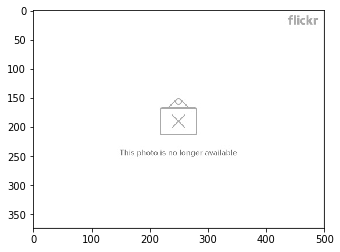

skipped
7300


In [5]:
pred_data_len = 7300
# X_pred = np.zeros((pred_data_len, 150, 150, 3), dtype=np.uint8)
image_dir = "Dataset/seg_pred/"

i=0
image_file = open("Data/PredResult.csv", "w")
f = csv.writer(image_file)
f.writerow(["image_name","label"])
X_prediction = np.zeros((1, 150, 150, 3))
for _,_,images in os.walk(image_dir):
    for image in images:
        img = imread(image_dir+image)
        try:
            shape = img.shape
            X_prediction[0, :shape[0], :shape[1], :] = img
            f.writerow([image,np.argmax(model.predict(X_prediction))])
        except ValueError:
            print("Image size out of bounds")
            print("Error image = " + image)
            plt.imshow(img)
            plt.show()
            print("skipped")
            continue
        
        i+=1

print(i)

In [20]:
np.save("Data/X_pred", X_pred)
print("Data Saved")

Data Saved


In [6]:
X_pred = np.load("Data/X_pred.npy")

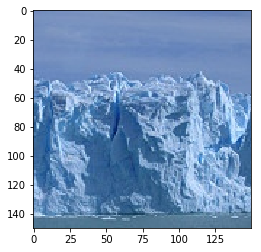

In [5]:
plt.imshow(X_pred[237])
plt.show()

In [6]:
Y_pred = model.predict(X_pred, verbose=1)

7300/7300 [==============================] - 158s 22ms/step


In [23]:
print(Y_pred.shape)

(7300, 6)


In [7]:
file = open("Data/Predictions.csv", "a")
f = csv.writer(file)
f.writerow(["label"])
for i in range(Y_pred.shape[0]):
    res = np.argmax(Y_pred[i])
    f.writerow([res])